In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
import seaborn as sns
from sklearn.metrics import accuracy_score

In [39]:
data=pd.read_csv("winequality-red.csv")

In [40]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [41]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
data.shape

(1599, 12)

In [43]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

C:\Users\msr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chlorides', ylabel='count'>

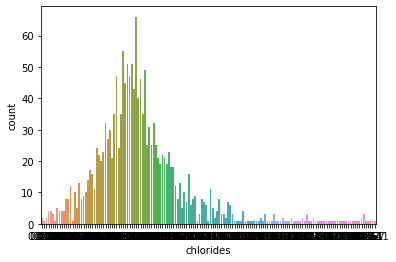

In [44]:
sns.countplot(data['chlorides'])

C:\Users\msr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fixed acidity', ylabel='count'>

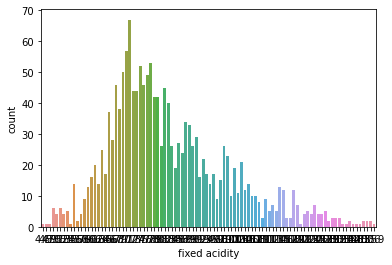

In [45]:
sns.countplot(data['fixed acidity'])

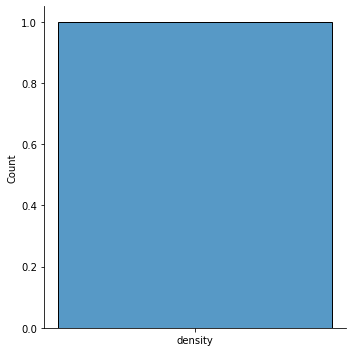

In [46]:
sns.displot(['density'])

In [47]:
correlation=data.corr()

<AxesSubplot:>

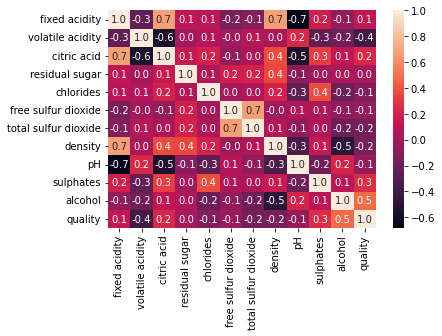

In [48]:
sns.heatmap(correlation,cbar=True,fmt='.1f', annot=True, annot_kws={'size':10})

In [49]:
X=data.drop(columns=['quality'],axis=1)

In [50]:
Y=data['quality']

In [51]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [52]:
print(Y)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=1)

In [54]:
model=XGBRegressor()

In [55]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [56]:
prediction=model.predict(X_test)

In [57]:
print(prediction)

[4.999802  5.611831  6.3820367 5.805502  6.413079  6.293649  5.8954263
 5.1433206 5.481238  5.340222  5.5055265 5.204789  5.785942  6.0006094
 5.915692  5.4129043 5.9974694 5.0932946 5.061981  5.012086  6.0174246
 6.1823187 5.045705  6.2583694 4.943418  6.1559825 6.200654  5.6178627
 5.007503  6.993176  5.3376813 6.0053205 5.5021625 6.262294  5.4939804
 5.518878  5.0392437 5.7879825 7.334074  4.963557  6.1826644 4.98694
 5.1061287 5.44169   4.986178  5.9516354 5.076124  5.1335487 5.02883
 6.7428513 5.2027216 5.3168855 6.675127  4.9248285 5.627138  5.998339
 6.665334  5.6062484 6.216331  5.102949  6.4955006 4.5270014 5.0200086
 5.729029  4.873705  5.6593804 7.0565233 5.966751  5.5785527 6.4998226
 5.4939804 6.030991  5.9085727 4.8406577 4.9474525 5.222952  6.38703
 4.776953  4.9423614 5.582968  6.0569067 5.203295  5.0325985 6.2955766
 5.819358  5.2042003 4.9678283 6.9584575 5.0183306 5.9872847 4.892311
 6.47774   5.0149508 6.351263  6.272232  5.1393785 6.5537586 5.3283095
 5.42669   5.4

In [58]:
error=metrics.mean_absolute_error(Y_test,prediction)

In [59]:
print(error)

0.3924728035926819
